# Geometric Distribution
## *If I throw 100 darts at the number line between 1 and 1000, how far apart do we expect them to be?*

In [111]:
import random
import math

line_len = 1000
num_darts = 100

line = [0 for x in xrange(line_len)]

print "throwing darts..."
for i in xrange(num_darts):
    pos = random.randint(0,line_len-1)
    line[pos] += 1
    
    if (i < 10):
        print "%d: %d" % (i, pos)
    

print "The maximum number of darts at one position was %d" % (max(line))

throwing darts...
0: 287
1: 2521
2: 5384
3: 6135
4: 576
5: 7624
6: 1546
7: 2526
8: 4493
9: 9576
The maximum number of darts at one position was 2


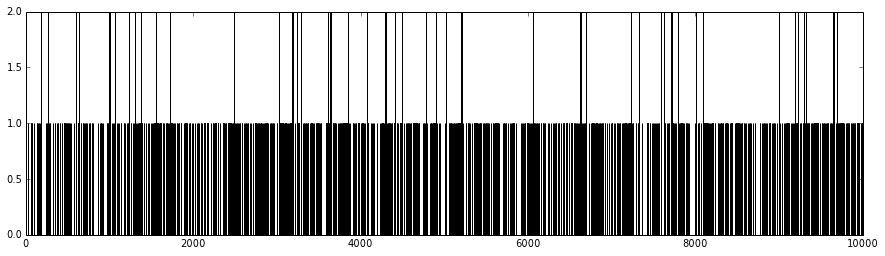

In [112]:
plt.figure(figsize=(15,4), dpi=100)
plt.bar(range(line_len), line)
plt.show()

In [113]:
## compute the distances between darts

distances = []

last_dart = -1
left_distance = line_len

for i in xrange(line_len):
    if (line[i] > 0):
        right_dist = i - last_dart
        min_dist = right_dist
        if (left_distance < min_dist):
            min_distance = left_distance
        
        if (last_dart != -1):
            distances.append(min_dist)
        
        if (line[i] > 1):
            for dd in xrange(line[i]-1):
                distances.append(0)
            left_distance = 0
        else:
            left_distance = right_dist
            
        last_dart = i

distances.append(last_distance)

mean = (sum(distances) + 0.) / len(distances)
expected_mean = float(line_len) / num_darts
print "The observed mean distance was %.02f and the expected mean was %.02f" % (mean, expected_mean)

The observed mean distance was 9.97 and the expected mean was 10.00


### The expected mean distance is intuitive, but what do we expect for the standard deviation and the shape of the distribution?

In [114]:
sumdiff = 0.0
for d in distances:
    diff = (d - mean) ** 2
    sumdiff += diff

sumdiff /= len(distances)
stdev = math.sqrt(sumdiff)

print "The range in distances was %d to %d" % (min(distances), max(distances))
print "The average distance between darts was: %.02f +/- %.02f" % (mean, stdev)
print "The expected distances was %.02f" % (float(line_len) / num_darts)

The range in distances was 0 to 70
The average distance between darts was: 9.97 +/- 9.69
The expected distances was 10.00


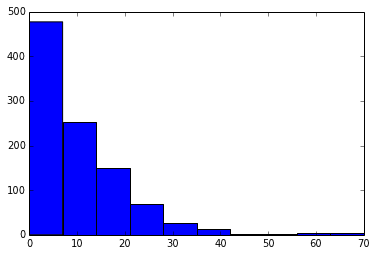

In [115]:
plt.figure()
plt.hist(distances)
plt.show()

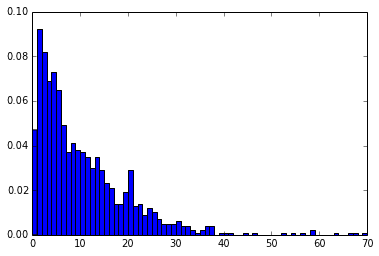

In [116]:
plt.figure()
plt.hist(distances, bins=range(max(distances)+1), normed=True)
plt.show()

## What happens if you increase the number of darts or the length of the number line?

## Notice that the probability of a given dart landing at a given spot is 

$$
p = \text{line_len} / \text{num_darts} \text{ (10%)}
$$

So the probability of a given dart not landing at the next position is

$$
1-p \text{ (90%)}
$$

And the probability of not having 2 darts in a row is

$$
(1-p)^2 \text{ (90% * 90% = .81%) }
$$

And not having 3 in a row

$$
(1-p)^3 \text{ (90% * 90% * 90% = 72.9%) }
$$

So the probability of not having several darts in a row followed by 1 dart is

$$
pdf = (1-p)^{k} p
$$

## This is called the geometric distribution

In [117]:
p = .1
geom_dist = []
for i in xrange(max(distances)+1):
    geom_prob = (1-p)**i * p
    geom_dist.append(geom_prob)

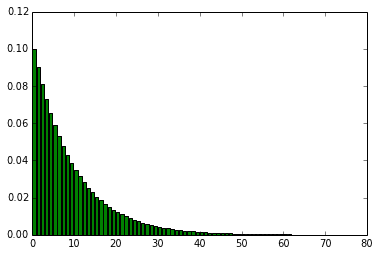

In [118]:
plt.figure()
plt.bar(range(len(geom_dist)), geom_dist, color="green")
plt.show()

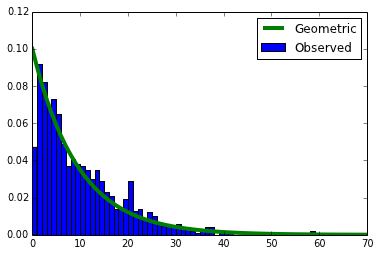

In [119]:
plt.figure()
plt.hist(distances, bins=range(max(distances)+1), normed=True, label="Observed")
plt.plot(range(len(geom_dist)), geom_dist, color="green", linewidth=4, label="Geometric")
plt.legend()
plt.show()

### The mean of the geometric distribution is 1/p (also p = 1/expected_mean)
### The stdev is sqrt((1-p)/p^2)

In [120]:
expected_stdev = math.sqrt((1-p)/(p**2))
print "The expected stdev was %.02f and we observed %.02f" % (expected_stdev, stdev)

The expected stdev was 9.49 and we observed 9.69


The geometric distribution can be well approximated by an exponential distribution

$$
pdf(x) = p * e^{-p * x}
$$

In [121]:
p = .1
exp_dist = []
for i in xrange(max(distances)+1):
    exp_prob = p * math.exp(-p * i)
    exp_dist.append(exp_prob)

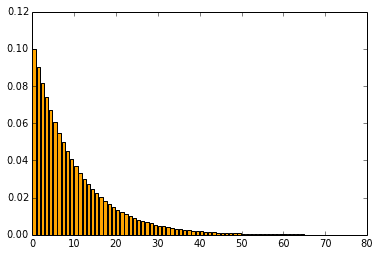

In [122]:
plt.figure()
plt.bar(range(len(exp_dist)), exp_dist, color="orange")
plt.show()

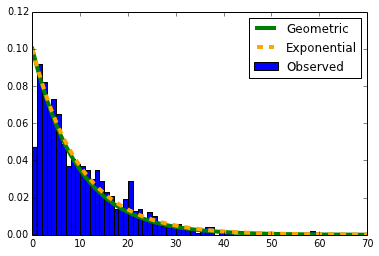

In [123]:
plt.figure()
plt.hist(distances, bins=range(max(distances)+1), normed=True, label="Observed")
plt.plot(range(len(geom_dist)), geom_dist, color="green", linewidth=4, label="Geometric")
plt.plot(range(len(exp_dist)),  exp_dist, color="orange", linewidth=4, linestyle="dashed", label="Exponential")
plt.legend()
plt.show()

## Try to set the number of darts so that the average spacing is 42
## *What does this imply when we see "clusters" of events?*

## Further reading
* http://www.matplotlib.org - The project web page for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended!
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
* https://docs.python.org/2/tutorial/ Python Tutorial
* http://en.wikipedia.org/wiki/Probability_distribution Probability distributions
* https://schatzlab.cshl.edu/teaching All my teaching materials